# Homework 1 - Assignment 4

In [1]:
import numpy as np
import librosa
import os
import scipy as sp
%matplotlib inline

import matplotlib.pyplot as plt
import IPython.display as ipd
from sklearn.mixture import BayesianGaussianMixture
import scipy.stats
import seaborn as sns
import csv
import tqdm   #to monitor loops during computation

In [2]:
class Sound:
    def __init__(self, path, slice_file_name, fold, classID, class_name, startTime, endTime):
        self.slice_file_name = path +'/fold'+fold+'/'+slice_file_name
        self.fold = fold
        self.classID = classID
        self.class_name = class_name
        self.startTime = startTime
        self.endTime = endTime

In [3]:
## read csv

classes = ['air_conditioner',
           'car_horn',
           'children_playing',
           'dog_bark',
           'drilling',
           'engine_idling',
           'gun_shot',
           'jackhammer',
           'siren',
           'street_music'
          ]

path = 'UrbanSound/UrbanSound8K.csv'
soundList = []
with open(path, newline='') as soundcsv:
            reader = csv.DictReader(soundcsv)
            for row in reader:
                s = Sound('UrbanSound/', row['slice_file_name'], row['fold'], row['classID'], row['class'], row['start'], 
                          row['end'])
                soundList.append(s)


In [4]:
def compute_mfcc(audio, fs, n_mfcc):
    X = np.abs(librosa.stft(
    audio,
    window='hamming',
    n_fft = 1024,
    hop_length = 512,
    ))
    
    mel = librosa.filters.mel(
        sr = fs,
        n_fft = 1024,
        n_mels = 40,
        fmin = 133.33, #standard value
        fmax = 6853.8
    )
    
    melspectrogram = np.dot(mel, X) 
    log_melspectrogram = np.log10(melspectrogram + 1e-16) 
    
    mfcc = sp.fftpack.dct(log_melspectrogram, axis=0, norm='ortho')[1:n_mfcc + 1]
    
    return mfcc

In [7]:
def extract_train_feature(folder_excluded, sound_class):
    sound_train_files = [s for s in soundList if s.class_name == sound_class and s.fold!=folder_excluded] 
    n_train_samples = len(sound_train_files)
    train_features = np.zeros((n_train_samples, n_mfcc))
    
    for index, f in enumerate(sound_train_files):
        audio, fs = librosa.load(sound_train_files[index].slice_file_name, sr=None)
        mfcc = compute_mfcc(audio,fs, n_mfcc)
        train_features[index, :] = np.mean(mfcc, axis=1)
    return train_features
    

In [8]:
## compute training

n_mfcc = 13

train_features_matrix= {'air_conditioner': [], 'car_horn':[], 'children_playing': [], 'dog_bark': [],
           'drilling': [], 'engine_idling': [], 'gun_shot': [], 'jackhammer': [], 'siren': [], 'street_music': []}

## fold cross validation
for i in np.arange(1,len(classes)):
    for c in classes:
        train_features_matrix[c].append(extract_train_feature(i,c))


In [ ]:
def extract_test_feature(folder_selected, sound_class):
    sound_test_files = [s for s in soundList if s.class_name == sound_class and s.fold==folder_excluded] 
    n_test_samples = len(sound_train_files)
    test_features = np.zeros((n_test_samples, n_mfcc))
    
    for index, f in enumerate(sound_test_files):
        audio, fs = librosa.load(sound_test_files[index].slice_file_name, sr=None)
        mfcc = compute_mfcc(audio,fs, n_mfcc)
        test_features[index, :] = np.mean(mfcc, axis=1)
    return test_features

In [ ]:
## compute test

test_features_matrix= {'air_conditioner': [], 'car_horn':[], 'children_playing': [], 'dog_bark': [],
           'drilling': [], 'engine_idling': [], 'gun_shot': [], 'jackhammer': [], 'siren': [], 'street_music': []}

for i in np.arange(1,len(classes)):
    for c in classes:
        test_features_matrix[c].append(extract_test_feature(i,c))
        

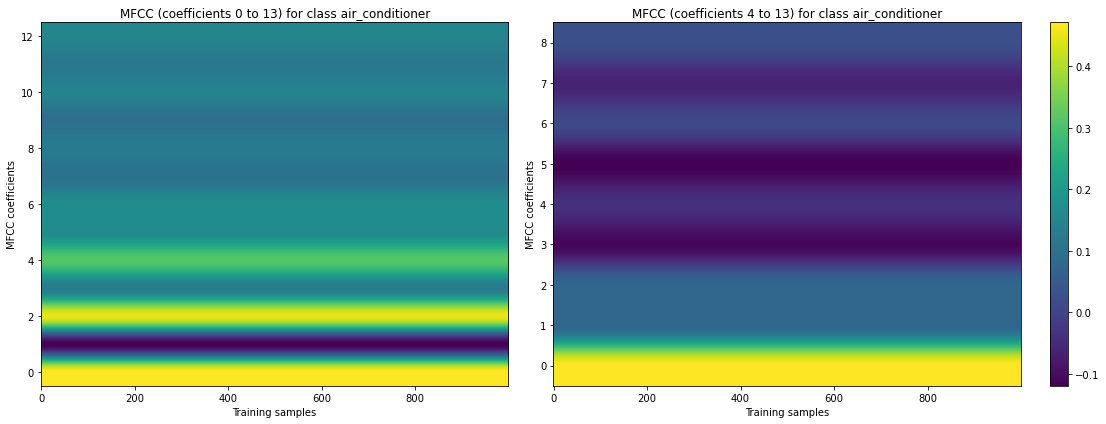

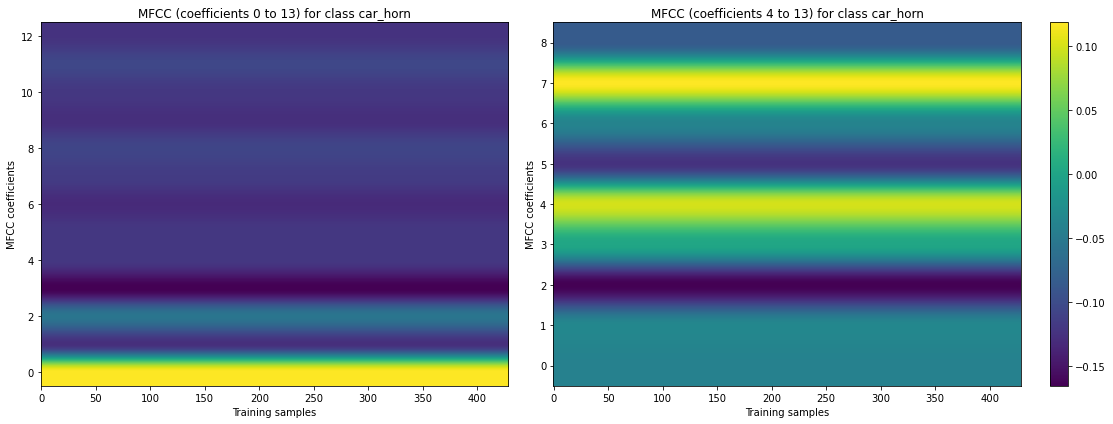

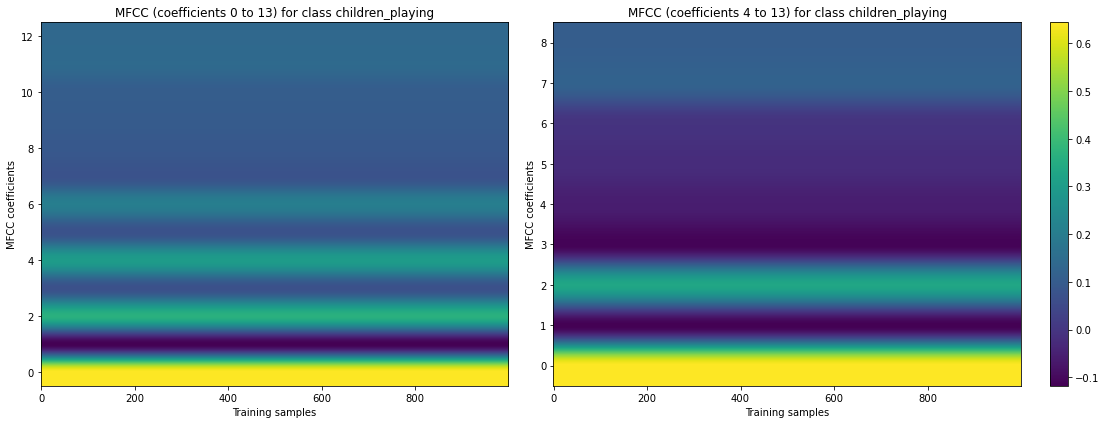

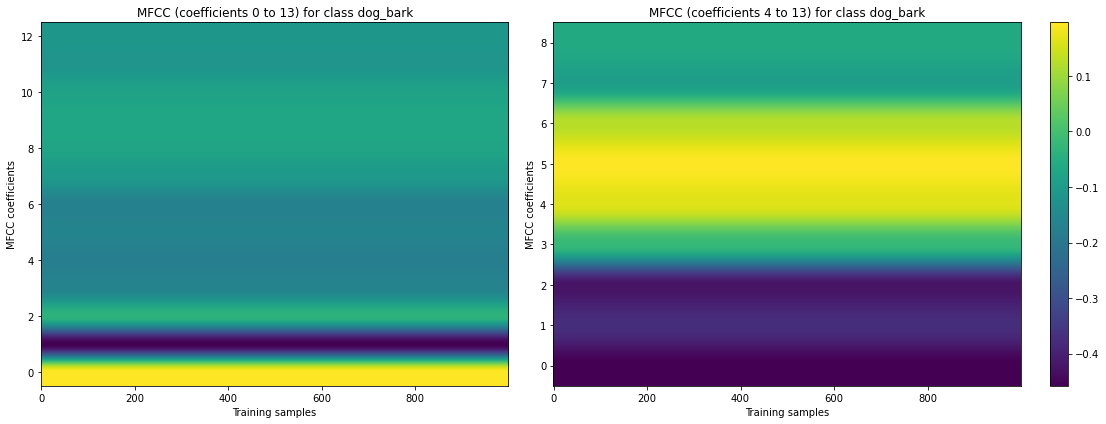

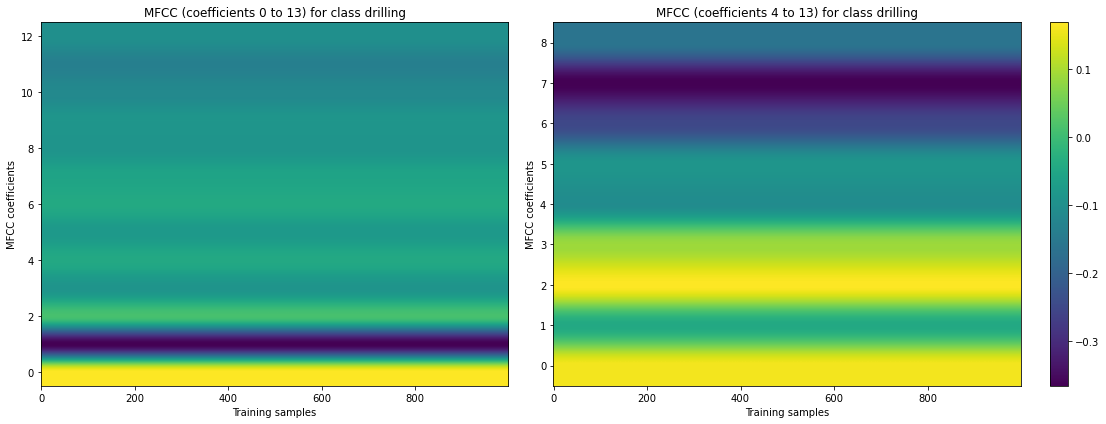

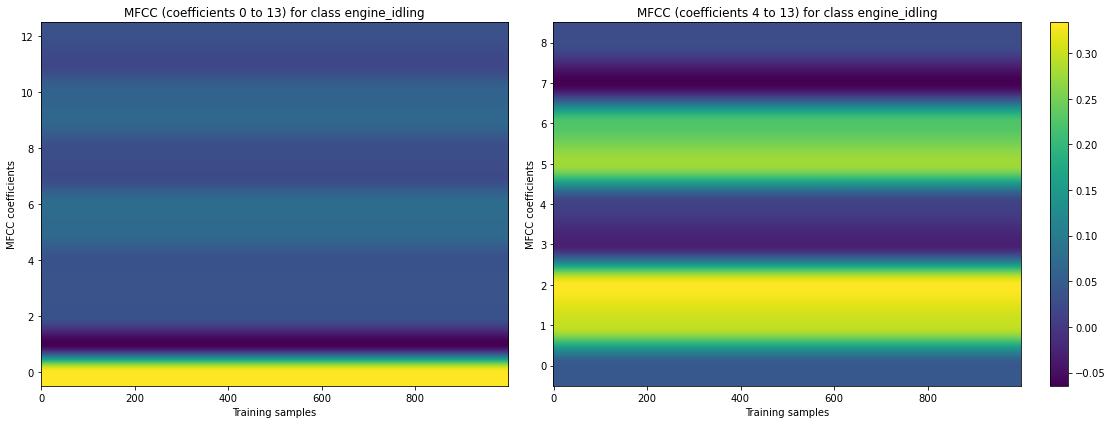

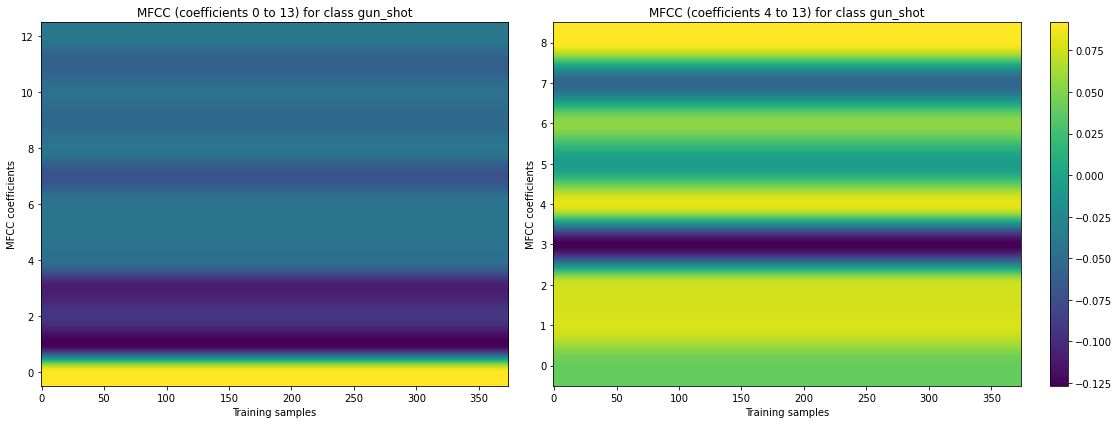

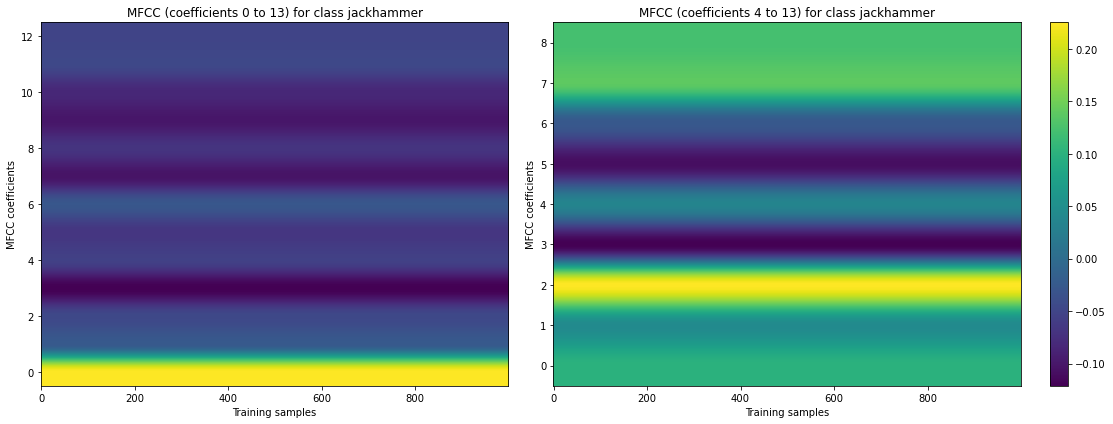

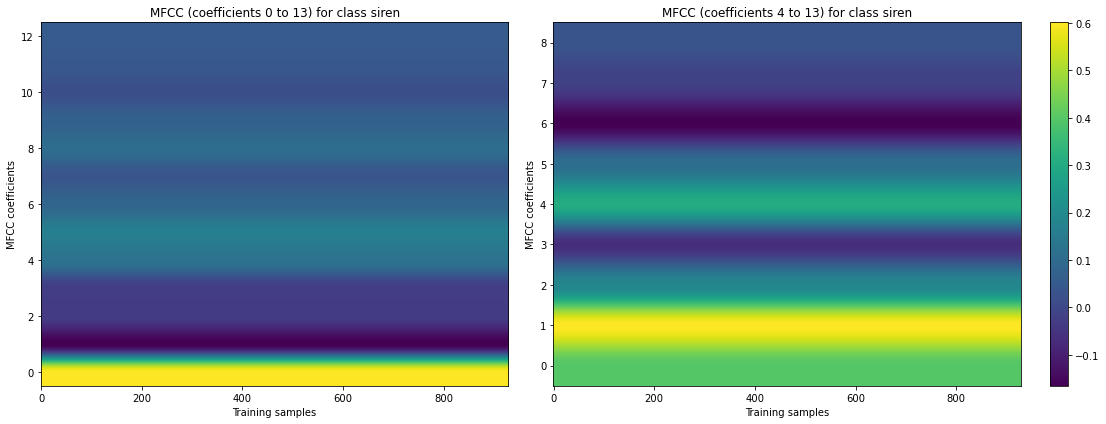

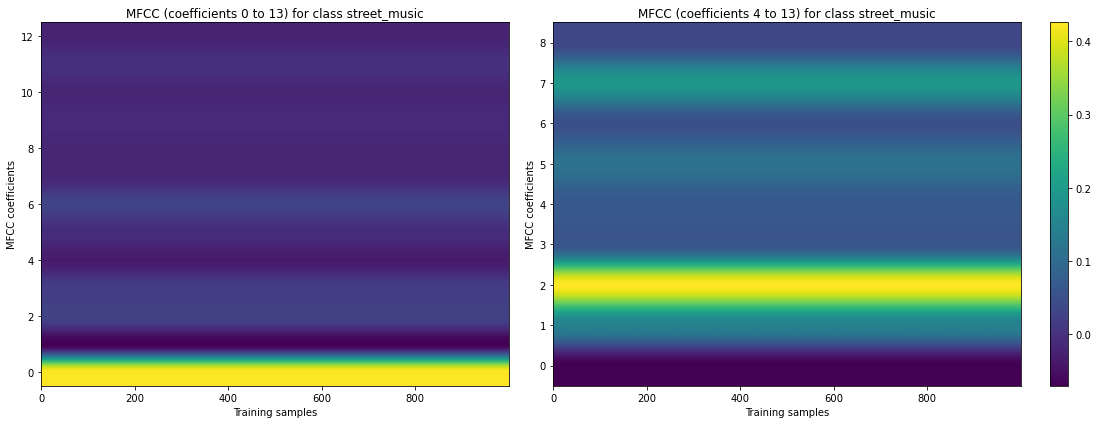

In [9]:
## visualization

for c in classes:
    mfcc = train_features_matrix[c][0].transpose()
    # Visualization
    fig = plt.figure(figsize=(16, 6))
    plt.subplot(1,2,1)
    plt.imshow(mfcc, origin='lower', aspect='auto')
    plt.xlabel('Training samples')
    plt.ylabel('MFCC coefficients')
    plt.title('MFCC (coefficients 0 to 13) for class {}'.format(c))
    plt.colorbar()
    plt.tight_layout()

    mfcc_upper = mfcc[4:]
    plt.subplot(1,2,2)
    plt.imshow(mfcc_upper, origin='lower', aspect='auto')
    plt.title('MFCC (coefficients 4 to 13) for class {}'.format(c))
    plt.xlabel('Training samples')
    plt.ylabel('MFCC coefficients')
    plt.colorbar()
    plt.tight_layout()